In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

In [4]:
#reading Csv file
car=pd.read_csv("C:\\Users\\aksha\\Documents\\Timeseries\\20100001.csv", parse_dates=['REF_DATE'])
#car=pd.read_csv("C:\\Users\\aksha\\Documents\\Timeseries\\20100001.csv",quoting=csv.QUOTE_ALL, parse_dates=['REF_DATE'])

C:\Users\aksha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
car.head()

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-01-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,2756.0,NaN,NaN,NaN,0
1,1946-01-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Dollars,Unadjusted,Dollars,81,thousands,3,v42169913,1.1.1.2.1,4507.0,NaN,NaN,NaN,0
2,1946-01-01,Canada,2016A000011124,Passenger cars,"Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169920,1.2.1.1.1,1102.0,NaN,NaN,NaN,0
3,1946-01-01,Canada,2016A000011124,Passenger cars,"Total, country of manufacture",Units,Seasonally adjusted,Units,300,units,0,v42169921,1.2.1.1.2,1468.0,NaN,NaN,t,0
4,1946-01-01,Canada,2016A000011124,Passenger cars,"Total, country of manufacture",Dollars,Unadjusted,Dollars,81,thousands,3,v42169922,1.2.1.2.1,1604.0,NaN,NaN,NaN,0


In [6]:
car.count()
car.dtypes

REF_DATE                 datetime64[ns]
GEO                              object
DGUID                            object
Vehicle type                     object
Origin of manufacture            object
Sales                            object
Seasonal adjustment              object
UOM                              object
UOM_ID                            int64
SCALAR_FACTOR                    object
SCALAR_ID                         int64
VECTOR                           object
COORDINATE                       object
VALUE                           float64
STATUS                           object
SYMBOL                          float64
TERMINATED                       object
DECIMALS                          int64
dtype: object

In [7]:
car.shape

(151794, 18)

In [10]:
#Taking the required data
car=car.drop(car.columns.difference(['REF_DATE','VALUE']),axis=1)

In [11]:
car.head()

,REF_DATE,VALUE
0,1946-01-01,2756.0
8,1946-02-01,3763.0
16,1946-03-01,7200.0
24,1946-04-01,9645.0
32,1946-05-01,12032.0


In [12]:
#car.set_index('REF_DATE')

In [13]:
#overall statistics for new cars sales
car.describe()

,VALUE
count,900.000000
mean,97079.784444
std,47447.267400
min,2756.000000
25%,57732.500000
50%,97458.000000
75%,131967.000000
max,220436.000000


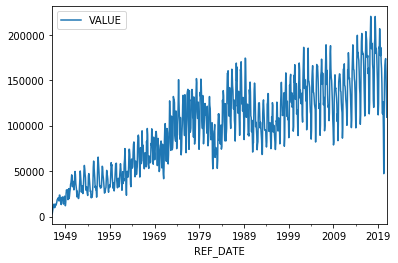

In [14]:
#plotting the data
car.plot(x='REF_DATE')


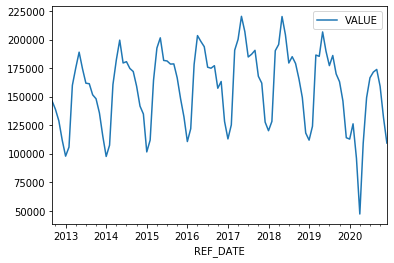

In [15]:
# plotting the graph within a range(Past 7 years)
car.iloc[800:900].plot(x='REF_DATE')

In [16]:
# For determining if the time series is stationary or not:
#p-value > 0.05: Fail to reject the null hypothesis (H0), 
#the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), 
#the data does not have a unit root and is stationary.
x=car['VALUE'].squeeze()
X=x.values

In [17]:
X

array([  2756.,   3763.,   7200.,   9645.,  12032.,  13388.,  13705.,
         9753.,  10154.,  11462.,  13497.,  12689.,  13977.,  15806.,
        18237.,  19176.,  19105.,  20688.,  20696.,  17094.,  23491.,
        23647.,  20690.,  17648.,  13704.,  13193.,  20974.,  19286.,
        18751.,  21626.,  16164.,  13676.,  19007.,  21110.,  22345.,
        21464.,  11838.,  15301.,  25054.,  29314.,  28385.,  27829.,
        29177.,  18561.,  28239.,  30722.,  19700.,  22221.,  26998.,
        30000.,  35324.,  37084.,  40645.,  45895.,  43914.,  32900.,
        39044.,  35811.,  32752.,  29328.,  33724.,  43576.,  49612.,
        46180.,  36445.,  32680.,  29260.,  21631.,  27996.,  22801.,
        21936.,  19807.,  20311.,  25131.,  32764.,  41046.,  50143.,
        43171.,  38133.,  26829.,  31936.,  33889.,  32176.,  25248.,
        30203.,  38528.,  49999.,  56261.,  52978.,  46691.,  42801.,
        29040.,  30029.,  32781.,  28140.,  25075.,  23150.,  30082.,
        44944.,  472

In [18]:
# Using  Augmented Dickey-Fuller test for unit root test.
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.822716
p-value: 0.369243
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


In [19]:
# Finding the difference
car['Value First Difference'] = car['VALUE'] - car['VALUE'].shift(1)
car['Seasonal First Difference'] = car['VALUE'] - car['VALUE'].shift(96)

In [20]:
car['Seasonal Second Difference']=car['Seasonal First Difference']-car['Seasonal First Difference'].shift(1)
car.head(100)

,REF_DATE,VALUE,Value First Difference,Seasonal First Difference,Seasonal Second Difference
0,1946-01-01,2756.0,NaN,NaN,NaN
8,1946-02-01,3763.0,1007.0,NaN,NaN
16,1946-03-01,7200.0,3437.0,NaN,NaN
24,1946-04-01,9645.0,2445.0,NaN,NaN
32,1946-05-01,12032.0,2387.0,NaN,NaN
...,...,...,...,...,...
870,1953-12-01,25075.0,-3065.0,NaN,NaN
888,1954-01-01,23150.0,-1925.0,20394.0,NaN
906,1954-02-01,30082.0,6932.0,26319.0,5925.0
924,1954-03-01,44944.0,14862.0,37744.0,11425.0


In [50]:
car.head(100)

,REF_DATE,VALUE,value First Difference,Seasonal First Difference,Seasonal Second Difference
0,1946-01-01,2756.0,NaN,NaN,NaN
8,1946-02-01,3763.0,1007.0,NaN,NaN
16,1946-03-01,7200.0,3437.0,NaN,NaN
24,1946-04-01,9645.0,2445.0,NaN,NaN
32,1946-05-01,12032.0,2387.0,NaN,NaN
...,...,...,...,...,...
870,1953-12-01,25075.0,-3065.0,NaN,NaN
888,1954-01-01,23150.0,-1925.0,20394.0,NaN
906,1954-02-01,30082.0,6932.0,26319.0,5925.0
924,1954-03-01,44944.0,14862.0,37744.0,11425.0


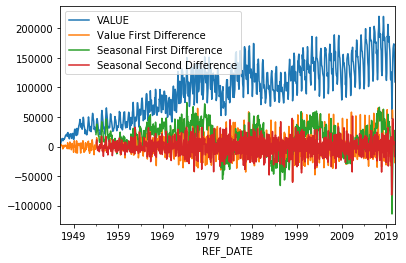

In [21]:
car.plot(x='REF_DATE')

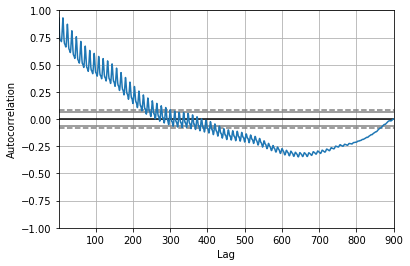

In [22]:
#Auto Regressive Model which predicts future behavior based on past behavior.
#It’s used for forecasting when there is some correlation between values in a time series and the values that precede and succeed them.
autocorrelation_plot(car['VALUE'])
plt.show()

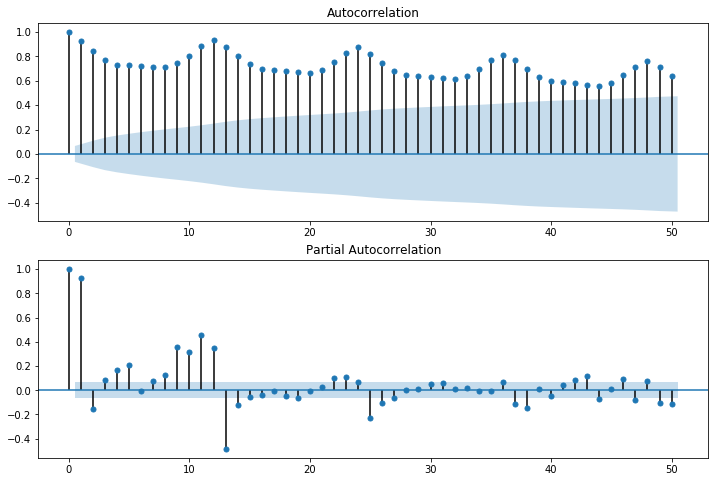

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(car['VALUE'],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(car['VALUE'],lags=50,ax=ax2)

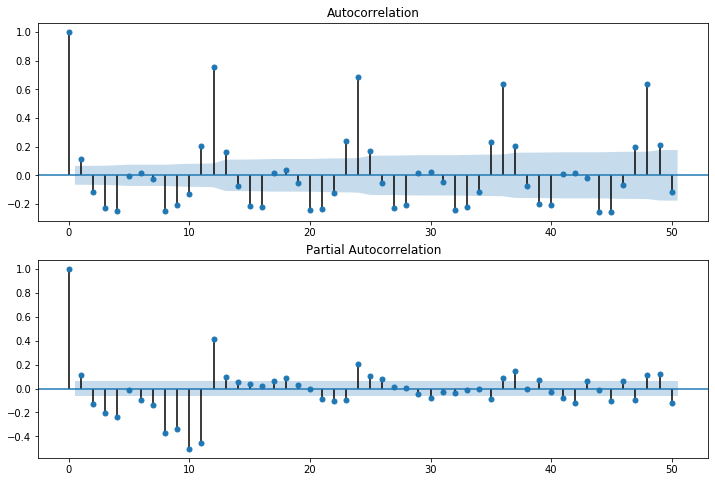

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(car['Value First Difference'].iloc[8:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(car['Value First Difference'].iloc[8:],lags=50,ax=ax2)

In [29]:
timeseries_2 = car['VALUE'] - car['VALUE'].mean()

In [30]:
# We performed the seasonality analysis in order to find out the prominent frequencies (periodicity) 
#in the frequency domain using the Fourier Transform for full-time series and the alternating 
#component of the series.
#Energy Spectral Density (ESD) plot
def get_esd(ts: pd.core.series.Series, fs: float) -> tuple:

    T = 1 / fs
    N = len(ts)
    F = 1 / (N * T)
    b = (np.abs(T * np.fft.fft(ts))) ** 2
    c = b[0:N//2+1]
    esd = c * 2
    f = np.array(range(int(N/2+1)))
    f = f * F
    return (esd, f) 

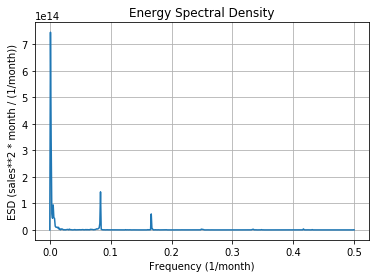

In [31]:
esd_2, f = get_esd(timeseries_2, 1.0)
plt.figure(3)
plt.plot(f, esd_2)
plt.title('Energy Spectral Density')
plt.xlabel('Frequency (1/month)')
plt.ylabel('ESD (sales**2 * month / (1/month))')
plt.grid()

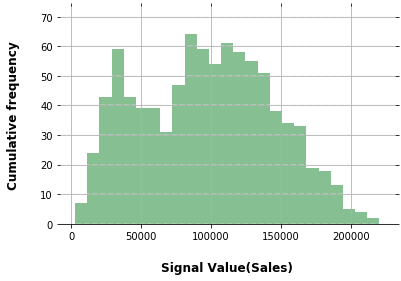

In [32]:
# Statistical analysis for understanding the probabilty distribution of the data
ax= pd.DataFrame.hist(car,column='VALUE', bins=25,color='#86bf91')
ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Signal Value(Sales)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Cumulative frequency", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

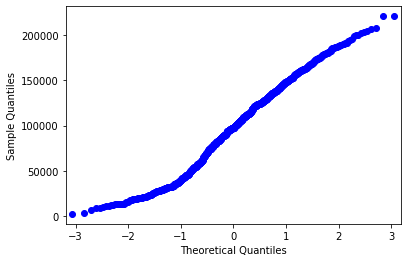

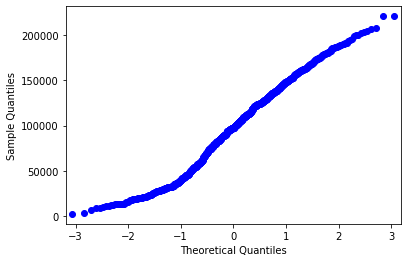

In [33]:
# QQplot provides a summary of whether the distributions of two variables are 
#similar or not with respect to the locations
sm.qqplot(car['VALUE'])


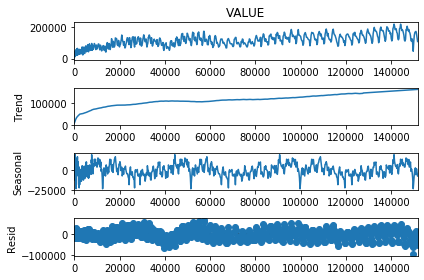

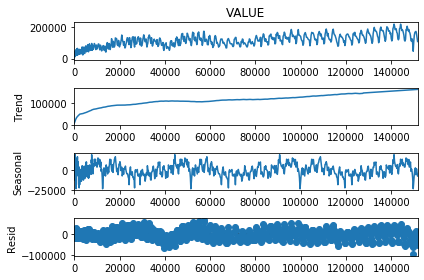

In [34]:
# Decomposing the values as seasonal,trend and noise
from statsmodels.tsa.seasonal import seasonal_decompose
car.sort_index(inplace= True)
result = seasonal_decompose(car['VALUE'], model='additive',extrapolate_trend='freq', period=200)
result.plot()

In [56]:
timeseries= car['VALUE']
timeseries_diff_1 = timeseries.diff().dropna()
timeseries_diff_2 = timeseries_diff_1.dropna()
p_value = adfuller(timeseries)[1].round(4)
print('Original Series: p_value = {0}'.format(p_value))
print("Data are STATIONARY \n" if p_value < .05 else "Data are NOT-STATIONARY \n")
p_value = adfuller(timeseries_diff_1)[1].round(4)
print('1st Order Differencing: p_value = {0}'.format(p_value))
print("Data are STATIONARY \n" if p_value < .05 else "Data are NOT-STATIONARY \n")
p_value = adfuller(timeseries_diff_2)[1].round(4)
print('2st Order Differencing: p_value = {0}'.format(p_value))
print("Data are STATIONARY \n" if p_value < .05 else "Data are NOT-STATIONARY \n")

Original Series: p_value = 0.3692
Data are NOT-STATIONARY 

1st Order Differencing: p_value = 0.0
Data are STATIONARY 

2st Order Differencing: p_value = 0.0
Data are STATIONARY 



In [48]:
def train_test_split(ts: pd.core.series.Series, test_size: int) -> tuple:
    train_size = len(ts) - test_size
    return (ts[:train_size], ts[train_size:])
# splitting the data into train / test 
TEST_PERIOD=15
train, test = train_test_split(ts=car['VALUE'], test_size=TEST_PERIOD*12)

model = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 0),
                                seasonal_order=(2, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model.fit()
print(results.summary())

C:\Users\aksha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\aksha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                                VALUE   No. Observations:                  720
Model:             SARIMAX(1, 1, 0)x(2, 0, [1], 12)   Log Likelihood               -7473.612
Date:                              Sun, 14 Mar 2021   AIC                          14957.224
Time:                                      12:11:48   BIC                          14979.936
Sample:                                           0   HQIC                         14966.007
                                              - 720                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3958      0.089     -4.471      0.000      -0.569      -0.222
ar.S.L12       1.15

In [161]:
car=car.drop(car.columns.difference(['REF_DATE','VALUE']),axis=1)
car=car.reset_index(drop=True)

In [149]:
#forecast the nearest 12 months (year 2020).

forecast_months = 12   # number of forecast months
fcast = results.predict(len(car['REF_DATE']),len(car['REF_DATE'])+forecast_months,
                                dynamic=True)
#car['fcast']=results.predict(len(car['REF_DATE']),len(car['REF_DATE'])+forecast_months,dynamic=True)


C:\Users\aksha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\aksha\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)
C:\Users\aksha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\aksha\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [150]:
from pandas.tseries.offsets import DateOffset
future_dates=[car['REF_DATE'][car.index[-1]] + DateOffset(months=x)for x in range(0,13)]

In [202]:
future_datest_df=pd.DataFrame(future_dates,columns=['REF_DATE'],index=pd.RangeIndex(start=900, stop=913))
#future_datest_df.columns=['REF_DATE']
future_datest_df

,REF_DATE
900,2020-12-01
901,2021-01-01
902,2021-02-01
903,2021-03-01
904,2021-04-01
905,2021-05-01
906,2021-06-01
907,2021-07-01
908,2021-08-01
909,2021-09-01


In [203]:
future_datest_df['fcast']=fcast
future_datest_df

,REF_DATE,fcast
900,2020-12-01,104194.471075
901,2021-01-01,114240.624902
902,2021-02-01,160909.791552
903,2021-03-01,171726.534107
904,2021-04-01,181764.593678
905,2021-05-01,172833.711706
906,2021-06-01,156767.534751
907,2021-07-01,153774.972668
908,2021-08-01,146514.813013
909,2021-09-01,136587.413977


In [205]:
future_df=pd.concat([car,future_datest_df])
future_df

,REF_DATE,VALUE,fcast
0,1946-01-01,2756.0,NaN
1,1946-02-01,3763.0,NaN
2,1946-03-01,7200.0,NaN
3,1946-04-01,9645.0,NaN
4,1946-05-01,12032.0,NaN
...,...,...,...
908,2021-08-01,NaN,146514.813013
909,2021-09-01,NaN,136587.413977
910,2021-10-01,NaN,135410.488339
911,2021-11-01,NaN,136026.904651


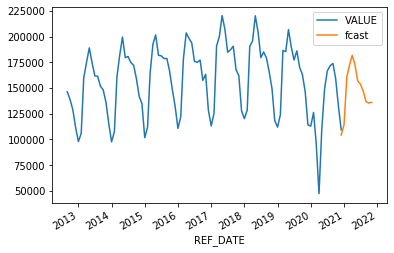

In [209]:
#Forecasting visualisation
future_df.iloc[800:912].plot(x='REF_DATE')